In [1]:
import pandas as pd
import numpy as np
from tesser import util
from tesser import fit
from tesser import network
from tesser import sr
from tesser import tasks
from tesser import rsa 
from scipy.stats import linregress
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = "/home/rodrigo/Dropbox/tesser_successor/Data/"
subject = 110
gamma, alpha = 0.5, 0.5
struc_data = util.load_struct_df_all(data_dir,subject)

In [3]:
struc_data

,SubjNum,run,trial,objnum,file,orientnam,orientnum,resp,respnum,acc,rt,part,seqtype
0,110,1,1,1,object_23.jpg,cor,1.0,n,2.0,0.0,0.982789,1,NaN
1,110,1,2,21,object_9.jpg,cor,1.0,c,1.0,1.0,1.443479,1,NaN
2,110,1,3,18,object_2.jpg,cor,1.0,c,1.0,1.0,0.860733,1,NaN
3,110,1,4,2,object_28.jpg,cor,1.0,c,1.0,1.0,0.922181,1,NaN
4,110,1,5,1,object_23.jpg,cor,1.0,c,1.0,1.0,1.217102,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,110,6,145,7,object_17.jpg,cor,1.0,c,1.0,1.0,0.846378,2,1.0
145,110,6,146,10,object_16.jpg,cor,1.0,c,1.0,1.0,0.801055,2,1.0
146,110,6,147,11,object_35.jpg,cor,1.0,c,1.0,1.0,0.899362,2,1.0
147,110,6,148,16,object_4.jpg,cor,1.0,c,1.0,1.0,0.796339,2,1.0


In [4]:
#help(sr)

In [5]:
SR_standard = sr.learn_sr(struc_data,gamma,alpha)
SR_reset = sr.explore_runs(struc_data,"reset",gamma,alpha)
SR_independent = sr.explore_runs(struc_data,"independent",gamma,alpha)

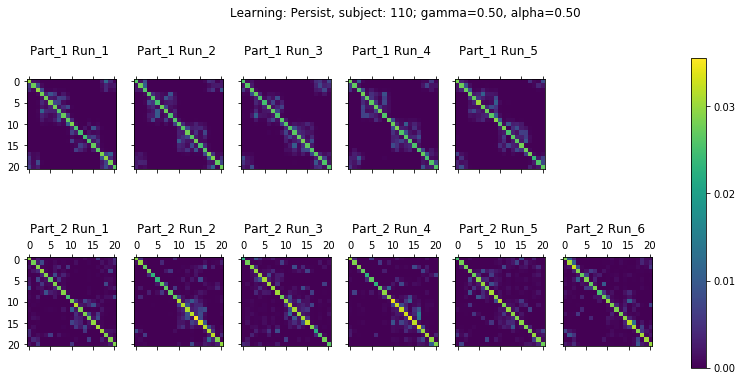

In [6]:
sr.plot_sr(SR_standard,subject,"Persist",gamma,alpha)

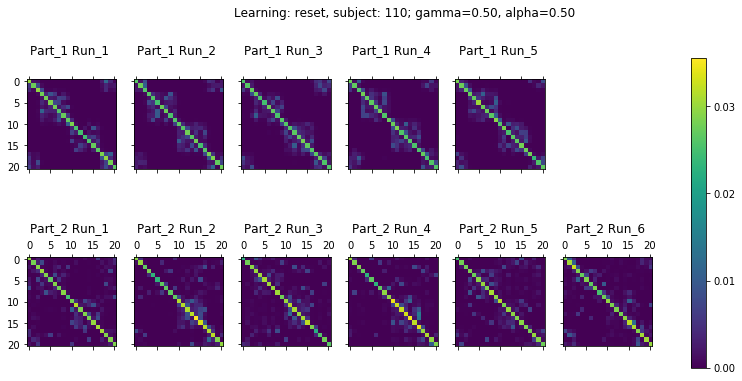

In [7]:
sr.plot_sr(SR_reset,subject,"reset",gamma,alpha)

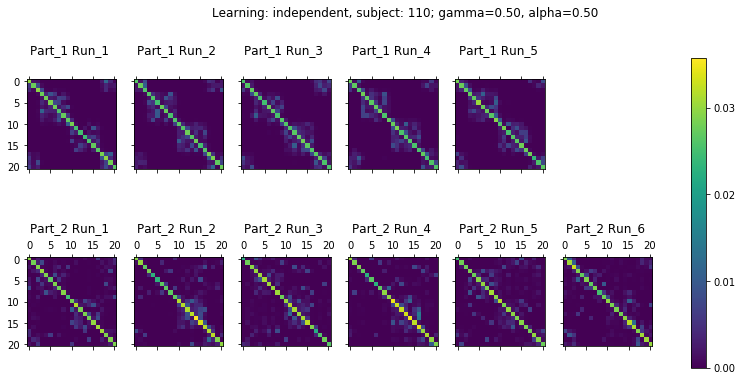

In [8]:
sr.plot_sr(SR_independent,subject,"independent",gamma,alpha)

In [9]:
grouping_mat = util.load_group(data_dir,subject)


In [10]:
grouping_df = tasks.group_dist(grouping_mat, distance='Euclidean')

In [11]:
fit.grouping_error(struc_data, grouping_df, gamma, alpha)

845.217642615276

In [12]:
fit.minimize_grouping_error(struc_data, grouping_df, 'differential evolution')

(0.99, 0.99)

In [14]:
fit.grouping_error(struc_data, grouping_df, 0.99,0.99)

402.6840771326972

In [13]:
fit.minimize_grouping_error(struc_data, grouping_df, 'basinhopping')

(6.947595957990745, 1.0000008371928237)

In [16]:
fit.grouping_error(struc_data, grouping_df, 1.0000008371928237, 6.947595957990745)

7.297566914119597e-14